In [1]:
def inter(x, x1, x2, y1, y2):
    """
    Realiza uma interpolação linear simples entre dois pontos.

    :param x: O valor de x onde você deseja interpolar y.
    :param x1: O primeiro valor conhecido de x.
    :param x2: O segundo valor conhecido de x.
    :param y1: O valor de y correspondente a x1.
    :param y2: O valor de y correspondente a x2.
    """
    # Fórmula de interpolação linear
    y = y1 + (y2 - y1) * (x - x1) / (x2 - x1)
    
    # Exibe o valor interpolado
    print(f"y = {y}")

# Exemplo de uso:
inter(36, 20, 40, 7.02, 4.34)


y = 4.8759999999999994


In [82]:
%reset -f
import math
from sympy import symbols, Eq, solve
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [83]:
# Variáveis do fluido externo Anel (Frio) Etilenoglicol
# T média = 64,82 °C
m_a = 3.78  # Vazão mássica do fluido externo (kg/s)
T_a = 32  # Temperatura de entrada do fluido externo (°C)
rho_a = 1084
cp_a = 2583  # Capacidade calorífica específica do fluido externo (J/kg.K)
k_a = 0.26  # Condutividade térmica do fluido externo (W/m.K)
v_a = 4.32 * 10**(-6)
Pr_a = 46.52  # Número de Prandtl do fluido externo (adimensional)

In [84]:
# Variáveis do fluido interno  Tubo (Quente) (Água)
# T média = 36 °C
m_t = 0.6  # Vazão mássica do fluido interno (tubo) (kg/s)
T_t = 80  # Temperatura de entrada do fluido interno (°C)
rho_t = 995
cp_t = 4178.6  #  Capacidade calorífica específica do fluido interno (J/kg.K)
k_t = 0.622  # Condutividade térmica do fluido interno (W/m.K)
v_t = 7.276 * 10**(-7)
Pr_t = 4.87  # Número de Prandtl do fluido interno (adimensional)

In [85]:
# Variáveis do Trocador de Calor
Di_a = 51 / 1000   # Diâmetro externo do anel externo (mm convertido para m)
Di_t = 32.8 / 1000   # Diâmetro interno do tubo interno (mm convertido para m)
De_t = 32.8 /1000    # Diâmetro Externo do tubo interno (mm convertido para m)
L = 20  # Comprimento do trocador (m)
N = 10  # Número total de segmentos (adimensional)

In [86]:
A_t = (math.pi*Di_t**2)/4
A_a = (math.pi*(Di_a**2-De_t**2))/4
A_a

0.001197857862887252

In [87]:
V_t = m_t / (rho_t*A_t)
V_a = m_a / (rho_a*A_a)
V_a

2.9111007064257413

In [88]:
D_h = Di_a-De_t
D_h

0.0182

In [89]:
D_eq = (Di_a**2 - De_t**2)/De_t
D_eq

0.046498780487804876

In [90]:
Re_t = V_t * Di_t/ v_t
Re_a = V_a * D_eq/ v_a
Re_a

31333.942760644502

In [91]:
Nu_t = 0.023 * Re_t**(4/5) * Pr_t**0.3  # Número de Nusselt para o fluido quente (adimensional)
Nu_a = 0.023 * Re_a**(4/5) * Pr_a**0.4  # Número de Nusselt para o fluido frio (adimensional)
Nu_a

422.27537379923757

In [92]:
h_t = Nu_t * k_t / Di_t
h_a = Nu_a * k_a / D_eq
h_a

2361.1715411890546

In [93]:
U = 1 / ((1 / h_t) + (1 / h_a))  # Coeficiente global de transferência de calor (W/m².K)
U

1287.3343663066325

In [94]:
dx = L / N  # Comprimento de cada segmento (m)

A = math.pi * Di_t * dx #Área da superfície de troca de calor

C_q = m_t * cp_t # Capacidade térmica do fluido quente (W/K)
C_f = m_a * cp_a # Capacidade térmica do fluido frio (W/K)


In [95]:
# Impressão dos resultados
print(f"Número de Reynolds para o fluido frio (Re_a): {Re_a:.2f}")
print(f"Número de Reynolds para o fluido quente (Re_t): {Re_t:.2f}")
print(f"Número de Nusselt para o fluido frio (Nu_a): {Nu_a:.2f}")
print(f"Número de Nusselt para o fluido quente (Nu_t): {Nu_t:.2f}")
print(f"Coeficiente de transferência de calor para o fluido frio (h_a): {h_a:.2f} W/m².K")
print(f"Coeficiente de transferência de calor para o fluido quente (h_t): {h_t:.2f} W/m².K")
print(f"Coeficiente global de transferência de calor (U): {U:.2f} W/m².K")
print(f"Comprimento de cada segmento (dx): {dx:.2f} m")
print(f"Capacidade térmica do fluido quente (C_q): {C_q:.2f} W/K")
print(f"Capacidade térmica do fluido frio (C_f): {C_f:.2f} W/K")

Número de Reynolds para o fluido frio (Re_a): 31333.94
Número de Reynolds para o fluido quente (Re_t): 32171.53
Número de Nusselt para o fluido frio (Nu_a): 422.28
Número de Nusselt para o fluido quente (Nu_t): 149.27
Coeficiente de transferência de calor para o fluido frio (h_a): 2361.17 W/m².K
Coeficiente de transferência de calor para o fluido quente (h_t): 2830.61 W/m².K
Coeficiente global de transferência de calor (U): 1287.33 W/m².K
Comprimento de cada segmento (dx): 2.00 m
Capacidade térmica do fluido quente (C_q): 2507.16 W/K
Capacidade térmica do fluido frio (C_f): 9763.74 W/K


In [96]:
T_q = T_t
T_f = T_a

In [97]:
# Cria variáveis para cada ponto de temperatura quente
T_quente = symbols('T_quente0:%d' % (N + 1))
# Cria variáveis para cada ponto de temperatura fria
T_frio = symbols('T_frio0:%d' % (N + 1))

# Criar listas vazias de equações
Equacoes_Quente = []
Equacoes_Frio = []

# Loop para criar as equações
for i in range(N):
    # Define a equação no lado quente do trocador
    eq_q = Eq(C_q * (T_quente[i] - T_quente[i + 1]), 
               ((U * A) / 2) * (T_quente[i] + T_quente[i + 1] - T_frio[i] - T_frio[i + 1]))
    # Define a equação no lado frio do trocador
    eq_f = Eq(-C_f * (T_frio[i + 1] - T_frio[i]), 
               ((U * A) / 2) * (T_quente[i] + T_quente[i + 1] - T_frio[i] - T_frio[i + 1]))
    # Adiciona a equação para o lado quente à lista de equações
    Equacoes_Quente.append(eq_q)
    # Adiciona a equação para o lado frio à lista de equações
    Equacoes_Frio.append(eq_f)


# Substitui T_quente[0] por T_q e T_frio[N] por T_f nas equações do lado quente
Equacoes_Quente = [eq.subs({T_quente[0]: T_q, T_frio[N]: T_f}) for eq in Equacoes_Quente]
# Substitui T_quente[0] por T_q e T_frio[N] por T_f nas equações do lado frio
Equacoes_Frio = [eq.subs({T_quente[0]: T_q, T_frio[N]: T_f}) for eq in Equacoes_Frio]

# Resolve o sistema combinado de equações para encontrar as temperaturas em cada ponto
solucao = solve(Equacoes_Quente + Equacoes_Frio, T_quente + T_frio)

# Adiciona T_q ao início da lista e depois os pontos intermediários
temperaturas_quente = [T_q] + [solucao[T_quente[i]] for i in range(1, N + 1)]
# Adiciona os pontos intermediários e T_f ao final da lista
temperaturas_frio = [solucao[T_frio[i]] for i in range(N)] + [T_f]

# Cria um DataFrame para organizar e exibir as temperaturas calculadas para cada segmento
df = pd.DataFrame({
    'Segmento': range(N + 1),  # Cria uma coluna para o número do segmento
    'Temperatura Quente (°C)': temperaturas_quente,  # Adiciona as temperaturas quentes calculadas
    'Temperatura Frio (°C)': temperaturas_frio  # Adiciona as temperaturas frias calculadas
})


In [98]:
df2 = df.copy()
# Renomear a coluna "Segmento" para "L(metro)"
df2.rename(columns={'Segmento': 'L(metro)'}, inplace=True)

# Atualizar os valores da coluna "L(metro)"
df2['L(metro)'] = df2['L(metro)'] * L / N


df2['Temperatura Quente (°C)'] = df2['Temperatura Quente (°C)'].astype(float)
df2['Temperatura Frio (°C)'] = df2['Temperatura Frio (°C)'].astype(float)


Resultado = df2.style.format({
    'L(metro)': '{:.2f}',
    'Temperatura Quente (°C)': '{:.3f}',
    'Temperatura Frio (°C)': '{:.3f}'
}).hide(axis='index')

Resultado

L(metro),Temperatura Quente (°C),Temperatura Frio (°C)
0.00,80.000,39.603
2.00,75.887,38.547
4.00,72.085,37.571
6.00,68.571,36.668
8.00,65.323,35.834
10.00,62.320,35.063
12.00,59.545,34.351
14.00,56.980,33.692
16.00,54.609,33.083
18.00,52.417,32.520


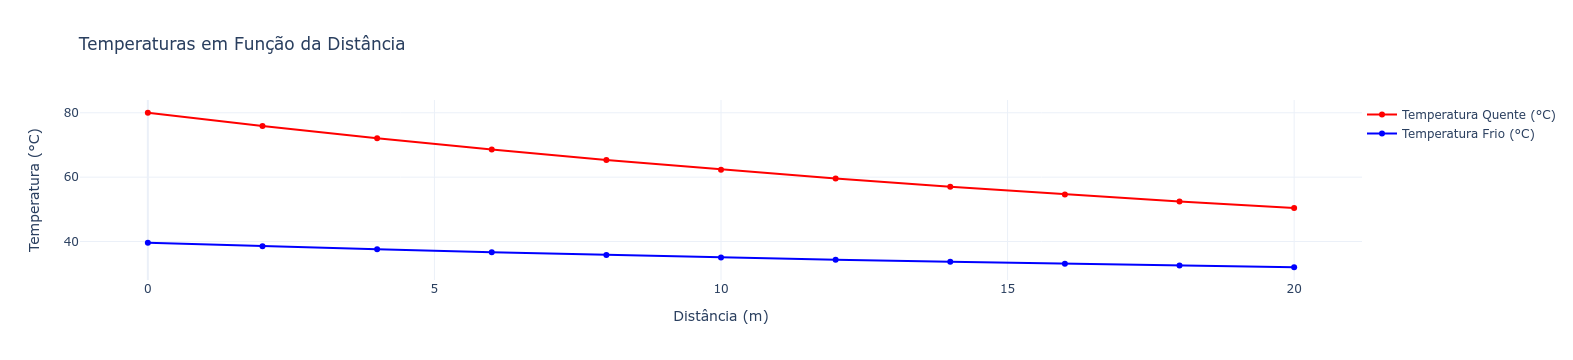

In [99]:
# Criar gráfico
fig = go.Figure()

# Adicionar traços para as duas colunas de temperatura com cores especificadas
fig.add_trace(go.Scatter(
    x=df2['L(metro)'], 
    y=df2['Temperatura Quente (°C)'], 
    mode='lines+markers', 
    name='Temperatura Quente (°C)',
    line=dict(color='red'),
    hovertemplate='<b>Distância: %{x:.2f} m</b><br>Temperatura Quente: %{y:.2f} °C<extra></extra>'
))

fig.add_trace(go.Scatter(
    x=df2['L(metro)'], 
    y=df2['Temperatura Frio (°C)'], 
    mode='lines+markers', 
    name='Temperatura Frio (°C)',
    line=dict(color='blue'),
    hovertemplate='<b>Distância: %{x:.2f} m</b><br>Temperatura Frio: %{y:.2f} °C<extra></extra>'
))

# Configurar título e rótulos
fig.update_layout(
    title='Temperaturas em Função da Distância',
    xaxis_title='Distância (m)',
    yaxis_title='Temperatura (°C)',
    template='plotly_white',
    legend=dict(
        x=1,  # Posição horizontal da legenda
        y=1,  # Posição vertical da legenda
        traceorder='normal',
        orientation='v'  # Orientação vertical
    )
)

# Mostrar o gráfico
fig.show()
